In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [ ]:
zero = plt.imread('./img/0.jpg')
one = plt.imread('./img/1.jpg') 
two = plt.imread('./img/2.jpg')
three = plt.imread('./img/3.jpg')
four = plt.imread('./img/4.jpg')
five = plt.imread('./img/5.jpg')
six = plt.imread('./img/6.jpg')
seven = plt.imread('./img/7.jpg')
eight = plt.imread('./img/8.jpg')
nine = plt.imread('./img/9.jpg')

In [ ]:
test_zero = plt.imread('./img_prep/zero.jpg').reshape(1,28,28,1).astype(np.float32) / 255
test_one = plt.imread('./img_prep/one.jpg').reshape(1,28,28,1).astype(np.float32) / 255
test_two = plt.imread('./img_prep/two.jpg').reshape(1,28,28,1).astype(np.float32) / 255
test_three = plt.imread('./img_prep/three.jpg').reshape(1,28,28,1).astype(np.float32) / 255
test_four = plt.imread('./img_prep/four.jpg').reshape(1,28,28,1).astype(np.float32) / 255
test_five = plt.imread('./img_prep/five.jpg').reshape(1,28,28,1).astype(np.float32) / 255
test_six = plt.imread('./img_prep/six.jpg').reshape(1,28,28,1).astype(np.float32) / 255
test_seven = plt.imread('./img_prep/seven.jpg').reshape(1,28,28,1).astype(np.float32) / 255
test_eight = plt.imread('./img_prep/eight.jpg').reshape(1,28,28,1).astype(np.float32) / 255
test_nine = plt.imread('./img_prep/nine.jpg').reshape(1,28,28,1).astype(np.float32) / 255

In [ ]:
images =[zero, one, two, three, four, five, six, seven, eight, nine]
test_images = [test_zero, test_one, test_two, test_three, test_four, test_five, test_six, test_seven, test_eight, test_nine]

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 48s 111ms/step - loss: 0.7630 - accuracy: 0.7580 - val_loss: 0.0808 - val_accuracy: 0.9772
Epoch 2/15
422/422 [==============================] - 45s 107ms/step - loss: 0.1239 - accuracy: 0.9622 - val_loss: 0.0556 - val_accuracy: 0.9855
Epoch 3/15
422/422 [==============================] - 44s 105ms/step - loss: 0.0888 - accuracy: 0.9712 - val_loss: 0.0459 - val_accuracy: 0.9877
Epoch 4/15
422/422 [==============================] - 44s 104ms/step - loss: 0.0751 - accuracy: 0.9765 - val_loss: 0.0394 - val_accuracy: 0.9892
Epoch 5/15
422/422 [==============================] - 45s 106ms/step - loss: 0.0622 - accuracy: 0.9803 - val_loss: 0.0370 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 48s 114ms/step - loss: 0.0565 - accuracy: 0.9819 - val_loss: 0.0351 - val_accuracy: 0.9907
Epoch 7/15
422/422 [==============================] - 58s 137ms/step - loss: 0.0514 - accuracy: 0.9837 - val_loss: 0.0354 - val_ac

[0]


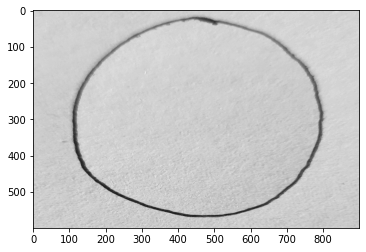

In [ ]:
pred0 = model.predict(test_zero)
label0 = np.argmax(pred0, axis=1) # Class probs to label
plt.imshow(zero, cmap='gray')
print(label0)

[1]


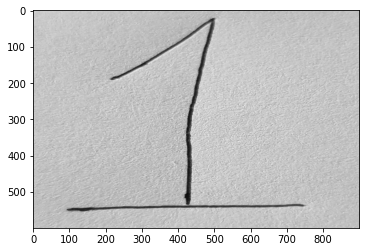

In [ ]:
pred1 = model.predict(test_one)
label1 = np.argmax(pred1, axis=1) # Class probs to label
plt.imshow(one, cmap='gray')
print(label1)

[2]


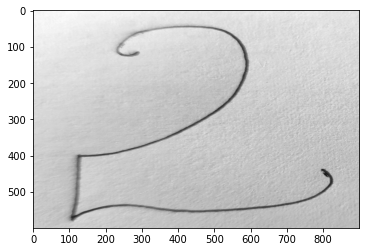

In [ ]:
pred2 = model.predict(test_two)
label2 = np.argmax(pred2, axis=1) # Class probs to label
plt.imshow(two, cmap='gray')
print(label2)

[3]


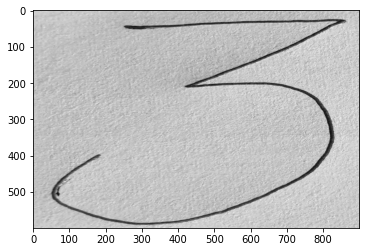

In [ ]:
pred3 = model.predict(test_three)
label3 = np.argmax(pred3, axis=1) # Class probs to label
plt.imshow(three, cmap='gray')
print(label3)

[4]


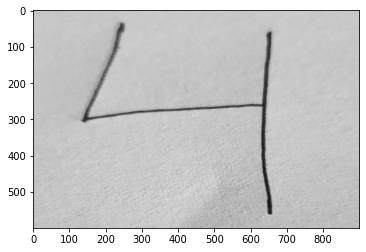

In [ ]:
pred4 = model.predict(test_four)
label4 = np.argmax(pred4, axis=1) # Class probs to label
plt.imshow(four, cmap='gray')
print(label4)

[5]


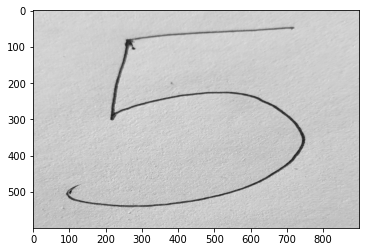

In [ ]:
pred5 = model.predict(test_five)
label5 = np.argmax(pred5, axis=1) # Class probs to label
plt.imshow(five, cmap='gray')
print(label5)

[6]


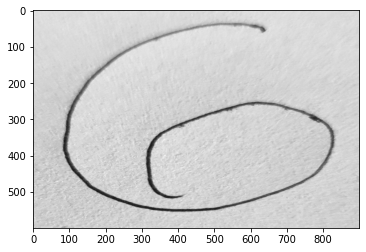

In [ ]:
pred6 = model.predict(test_six)
label6 = np.argmax(pred6, axis=1) # Class probs to label
plt.imshow(six, cmap='gray')
print(label6)

[3]


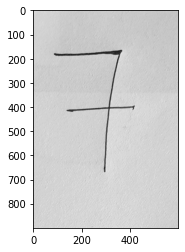

In [ ]:
pred7 = model.predict(test_seven)
label7 = np.argmax(pred7, axis=1) # Class probs to label
plt.imshow(seven, cmap='gray')
print(label7)

[8]


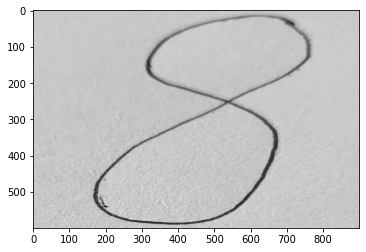

In [ ]:
pred8 = model.predict(test_eight)
label8 = np.argmax(pred8, axis=1) # Class probs to label
plt.imshow(eight, cmap='gray')
print(label8)

[9]


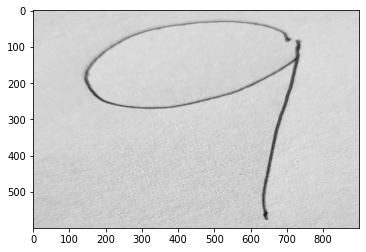

In [ ]:
pred9 = model.predict(test_nine)
label9 = np.argmax(pred9, axis=1) # Class probs to label
plt.imshow(nine, cmap='gray')
print(label9)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a18cdc7-6cb2-44ab-b468-a2bf42359d76' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>